In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn.datasets as datasets
import sklearn.metrics as metrics

In [2]:
X, Y = datasets.load_iris(return_X_y=True)

In [3]:
X12 = X[Y != 0]
Y12 = Y[Y != 0]
Y12[Y12 == 2] = -1
Y12 = Y12.astype("d")

In [4]:
import mlgrad.models as models
import mlgrad.funcs as funcs
import mlgrad.loss as loss
import mlgrad.regr as regr
import mlgrad.plots as plots

K=999 param=[ 3.782  1.055  1.594 -2.062 -2.967]
0.97


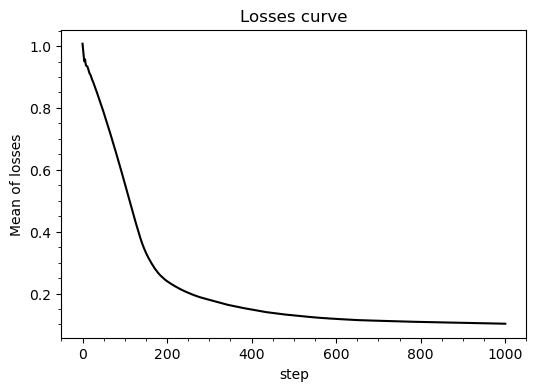

In [5]:
hinge_loss = loss.MarginLoss(funcs.Hinge())
linmod1 = models.LinearModel(4)
alg1 = regr.regression(X12, Y12, linmod1, hinge_loss, h=0.01, n_restart=1, verbose=1, n_iter=1000, tol=1.0e-8)
print(metrics.accuracy_score(np.sign(linmod1.evaluate(X12)),Y12))

plots.plot_losses(alg1)
plt.show()

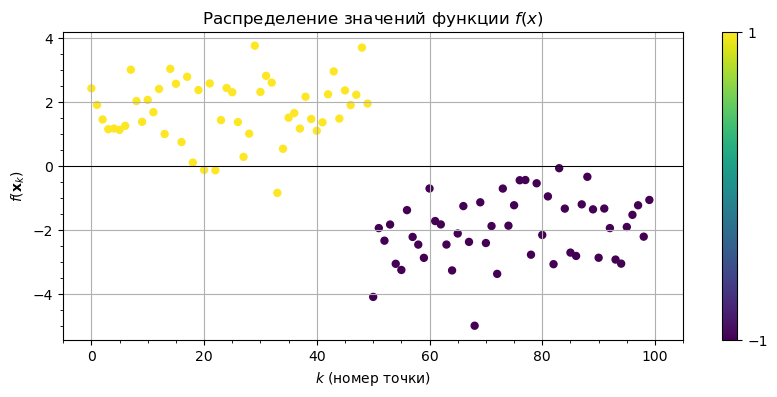

In [6]:
plt.figure(figsize=(10,4))
plots.plot_cls_function(linmod1, X12, Y12)
plt.show()

K=999 param=[ 1.169  0.266  0.410 -0.504 -0.915]
K=999 param=[ 3.070  0.268  0.562 -0.788 -1.472]
0.98


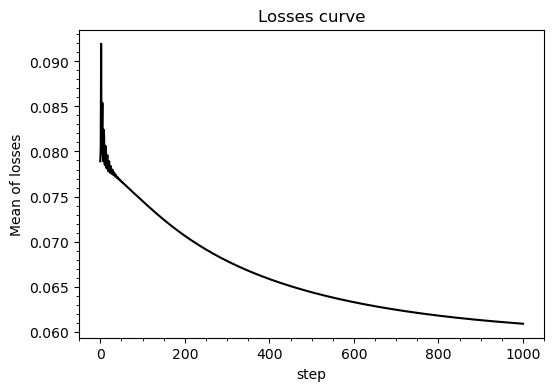

In [7]:
linmod2 = models.LinearModel(4)
softhinge_loss = loss.MarginLoss(funcs.SoftHinge_Exp(10.0))
alg2 = regr.regression(X12, Y12, linmod2, softhinge_loss, h=0.01, n_restart=2, verbose=1)
print(metrics.accuracy_score(np.sign(linmod2.evaluate(X12)),Y12))

plots.plot_losses(alg2)
plt.show()

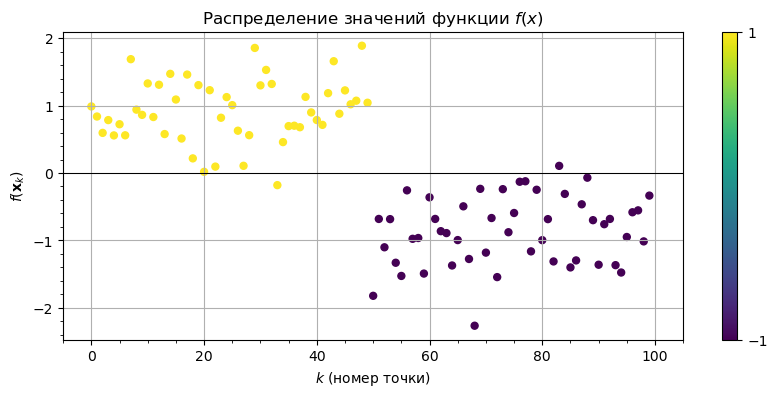

In [14]:
plt.figure(figsize=(10,4))
plots.plot_cls_function(linmod2, X12, Y12)
plt.show()

0.97


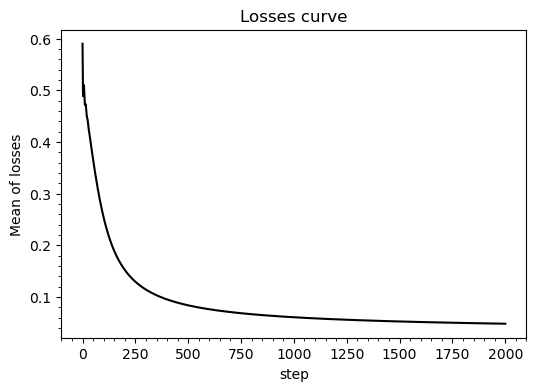

In [14]:
mod3 = models.SigmaNeuronModel(funcs.Sigmoidal(1.0), 4)
sqr_loss = loss.SquareErrorLoss()
alg3 = regr.regression(X12, Y12, mod3, sqr_loss, h=0.01, n_iter=2000)
print(metrics.accuracy_score(np.sign(mod3.evaluate(X12)),Y12))

plots.plot_losses(alg3)
plt.show()

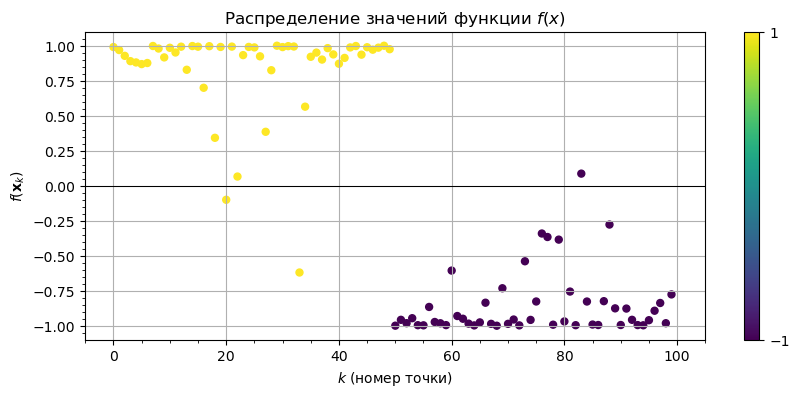

In [15]:
plt.figure(figsize=(10,4))
plots.plot_cls_function(mod3, X12, Y12)
plt.show()

0.98


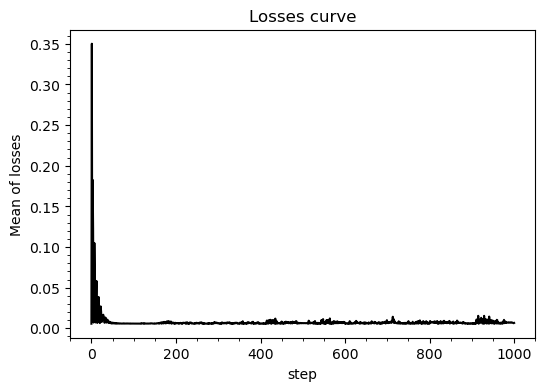

In [16]:
mod4 = models.SigmaNeuronModel(funcs.Sigmoidal(10.0), 4)
alg4 = regr.regression(X12, Y12, mod4, loss.MarginLoss(funcs.Hinge(0.1)), h=0.01, n_restart=3)
print(metrics.accuracy_score(np.sign(mod4.evaluate(X12)),Y12))

plots.plot_losses(alg4)
plt.show()

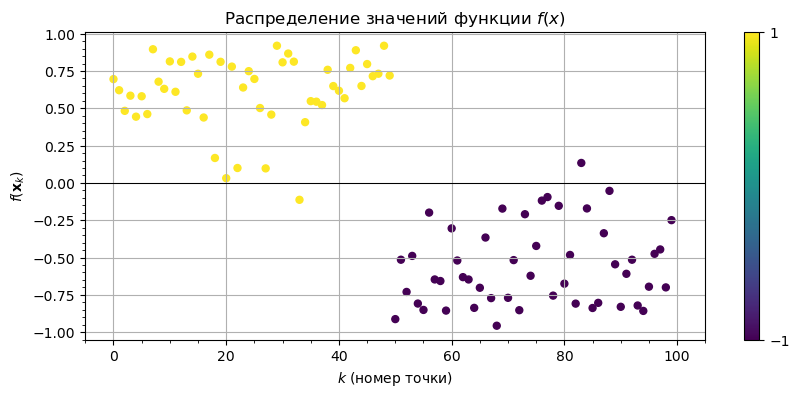

In [17]:
plt.figure(figsize=(10,4))
plots.plot_cls_function(mod4, X12, Y12)
plt.show()